In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

In [4]:
# Define a simplified AlexNet block
inputs = Input(shape=(32, 32, 3))
x = Conv2D(96, (11, 11), strides=1, padding='same', activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs, outputs)


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1792 - loss: 2.3463 - val_accuracy: 0.2934 - val_loss: 1.9493
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2668 - loss: 1.9100 - val_accuracy: 0.3750 - val_loss: 1.6749
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3043 - loss: 1.8135 - val_accuracy: 0.3954 - val_loss: 1.5881
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3302 - loss: 1.7482 - val_accuracy: 0.4473 - val_loss: 1.5375
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3494 - loss: 1.7023 - val_accuracy: 0.4413 - val_loss: 1.5624


In [7]:
# Evaluate the model
loss, acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4381 - loss: 1.5475
Test accuracy: 0.4349


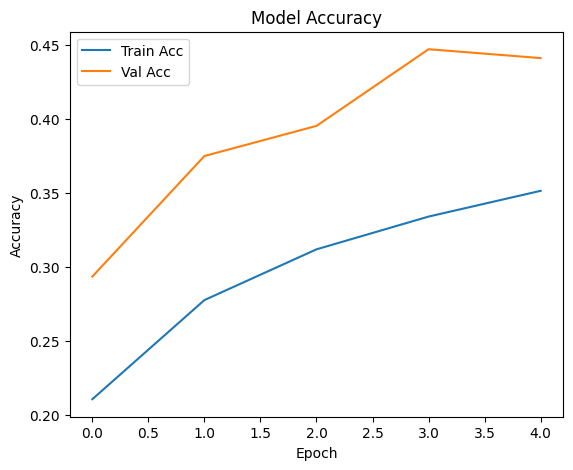

In [8]:
# Plot training & validation accuracy/loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


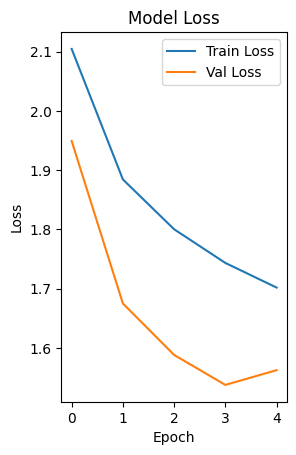

In [9]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

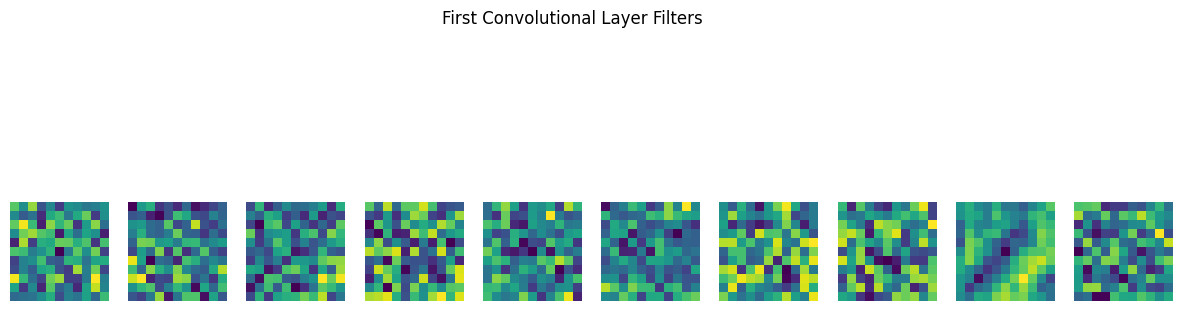

In [10]:
# Visualize learned filters of the first conv layer
weights = model.layers[1].get_weights()[0]
num_filters = weights.shape[-1]
plt.figure(figsize=(15, 5))
for i in range(min(num_filters, 10)):
    f = weights[:, :, :, i]
    f_min, f_max = f.min(), f.max()
    f = (f - f_min) / (f_max - f_min)
    plt.subplot(1, 10, i + 1)
    plt.imshow(f[:, :, 0], cmap='viridis')
    plt.axis('off')
plt.suptitle('First Convolutional Layer Filters')
plt.show()


In [11]:
# Visualize predictions
preds = model.predict(x_test[:10])
pred_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(y_test[:10], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


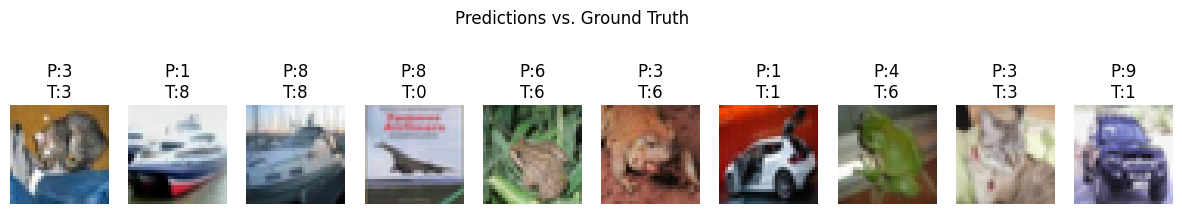

In [12]:
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"P:{pred_classes[i]}\nT:{true_classes[i]}")
    plt.axis('off')
plt.suptitle('Predictions vs. Ground Truth')
plt.show()
